# ML part of Thesis Implementation for NSL-KDD

## Step 1: Data Loading and Understanding

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Pandas Library for data processing
import pandas as pd
# Provide path where the dataset is present
dataPath = 'nslkdd\\'
# Load training data from disk
trainData = pd.read_csv(dataPath + 'KDDTrain+.txt')
# Load training data from disk
testData = pd.read_csv(dataPath + 'KDDTest+.txt')

#Combining both data
comData = pd.concat([trainData, testData])

# Display of training data
print("\033[1mTraining Data Table")
display(comData)
# Load attacks type data
attackFile = pd.read_csv(dataPath + 'training_attack_types.txt', delimiter = ' ')
#Display attack types, categories, length of train and test datasets
attackCats = attackFile['attack_category'].unique()
attackTypes = attackFile['attack_type'].unique()
# Printing data
print('\033[1mTotal attacks categories in the dataset are '+ str(len(attackCats)) +
      ' which are \033[0m\n{}'.format(attackCats))
print('\n\033[1mThese categories are mapped at '+ str(len(attackTypes)) +
      'attacks types which are \033[0m\n{}'.format(attackTypes))
print('\n\033[1mTraining Data samples are '+ str(len(trainData)) + ' which contains '+ str(trainData.shape[1]) +' features')
print('\n\033[1mTesting Data samples are '+ str(len(testData)))


Training Data Table


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Total attacks categories in the dataset are 39 which are 
['apache2' 'back' 'mailbomb' 'processtable' 'snmpgetattack' 'teardrop'
 'smurf' 'land' 'neptune' 'pod' 'udpstorm' 'ps' 'buffer_overflow' 'perl'
 'rootkit' 'loadmodule' 'xterm' 'sqlattack' 'httptunnel' 'ftp_write'
 'guess_passwd' 'snmpguess' 'imap' 'spy' 'warezclient' 'warezmaster'
 'multihop' 'phf' 'named' 'sendmail' 'xlock' 'xsnoop' 'worm' 'nmap'
 'ipsweep' 'portsweep' 'satan' 'mscan' 'saint']

These categories are mapped at 4attacks types which are 
['dos' 'u2r' 'r2l' 'probe']

Training Data samples are 125973 which contains 43 features

Testing Data samples are 22544


##  Step 2: Data Cleaning

### Mapping attack categories to attack types

In [3]:
# For loop to iterate over attack categories
for attCat, attType in zip(attackFile.attack_category, attackFile.attack_type):
    # Replace attack categories with types for training data
    comData.loc[comData.attack_category == attCat, 'attack_category'] = attType
    # Replace attack categories with types for testing data
#     testData.loc[testData.attack_category == attCat, 'attack_category'] = attType

In [4]:
labels = list(comData.attack_category.unique())
labels

['normal', 'dos', 'r2l', 'probe', 'u2r']

In [5]:
comX = comData.iloc[:, :-2].copy()
comY = comData['attack_category'].copy()
# trainY2L = trainData['attack_category'].copy()
feature_cols = list(comX.columns)

# testX = testData.iloc[:, :-2].copy()
# testY = testData['attack_category'].copy()
# testY2L = testData['attack_category'].copy()

In [6]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(comX, comY, test_size=0.2, random_state=42)

## Converting Categorical (String) values to Numeric Values

In [7]:
from pandas.api.types import is_string_dtype
for col in (trainX.columns):
    if is_string_dtype(trainX[col]) == True:
        trainX[col] = trainX[col].astype('category').cat.codes
        
        testX[col] = testX[col].astype('category').cat.codes

In [8]:
# list(trainX.astype(bool).sum(axis=0) / len(trainX) * 100 < 50)

In [9]:
# trainX = trainX.iloc[:, list(trainX.astype(bool).sum(axis=0) / len(trainX) * 100 > 40)]
testX = testX[trainX.columns]
feature_cols = trainX.columns

## Step 4: Data Visualization 

<Axes: xlabel='attack_category'>

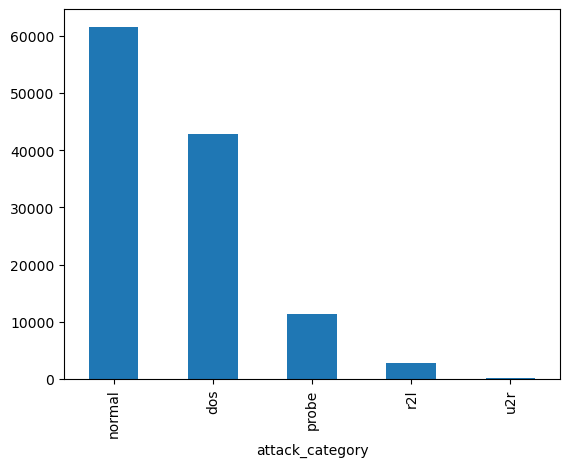

In [10]:
#Count each label samples in tranining and testing set
trainCats = trainY.value_counts()
testCats = testData['attack_category'].value_counts()
#Plot these counts of trian and test both
trainCats.plot(kind='bar')

## Step 5: Feature Engineering 

In [11]:
# Importing preprocessing functions from sklearn library
from sklearn.preprocessing import StandardScaler #normalization
x_train = StandardScaler().fit_transform(trainX)
x_test = StandardScaler().fit_transform(testX)

## Step 6: PCA

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
pca = PCA(n_components=2)
principalComponentsTr = pca.fit_transform(x_train)
principalDfTrX = pd.DataFrame(data = principalComponentsTr)

principalComponentsTst = pca.fit_transform(x_test)
principalDfTstX = pd.DataFrame(data = principalComponentsTst)

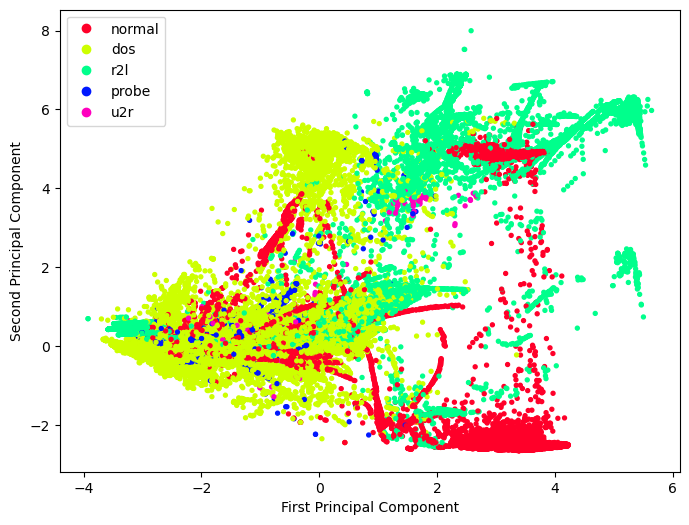

In [13]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
scatter = plt.scatter(principalDfTrX[:][0], principalDfTrX[:][1],c = trainY.astype('category').cat.codes, cmap ='gist_rainbow', s=8) 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels = labels)
plt.show()

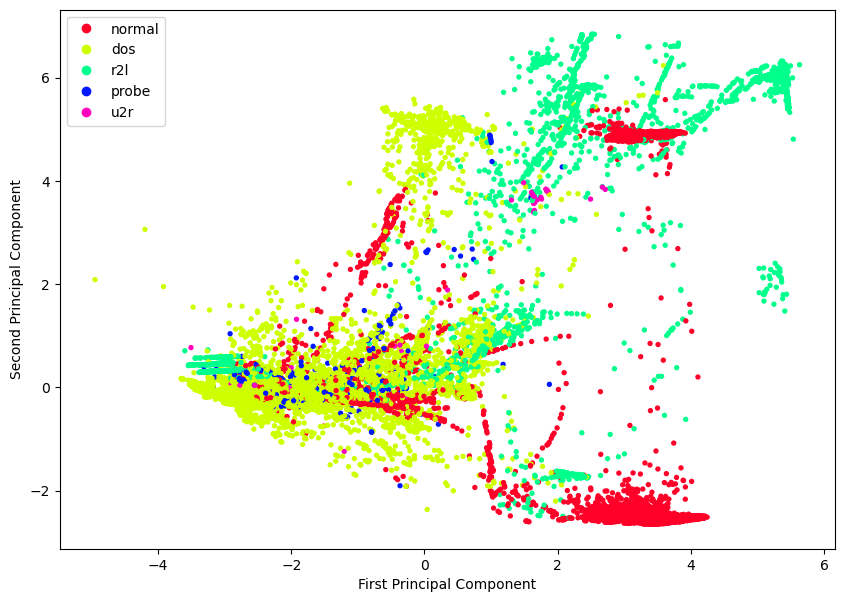

In [14]:
# giving a larger plot 
plt.figure(figsize =(10, 7)) 
  
scatter = plt.scatter(principalDfTstX[:][0], principalDfTstX[:][1],c = testY.astype('category').cat.codes, cmap ='gist_rainbow', s=8) 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels = labels)
plt.show()

## Step 6 and 7: Predictive Modelling and Results Visualization

##### Importing Required Libraries for preprocessing and performance measures

In [15]:
#Importing required libraries used for predictions and visualization
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score, classification_report, cohen_kappa_score, f1_score, precision_score, recall_score 
import matplotlib.pyplot as plt
import seaborn as sn
import time

In [16]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(trainX, trainY, random_state=0)

### a) Training/Testing and Individual Algorithm Comparison

#### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

model = DecisionTreeClassifier(criterion='gini')
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Decision Tree Classifier


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.996608,0.982294,0.975237,0.303657,0.260355,0.939537,0.703630,0.968859
recall,0.986384,0.908479,0.974172,0.790345,0.771930,0.939537,0.886262,0.939537
f1-score,0.991470,0.943946,0.974704,0.438744,0.389381,0.939537,0.747649,0.950553
support,10723.000000,15450.000000,2749.000000,725.000000,57.000000,0.939537,29704.000000,29704.000000


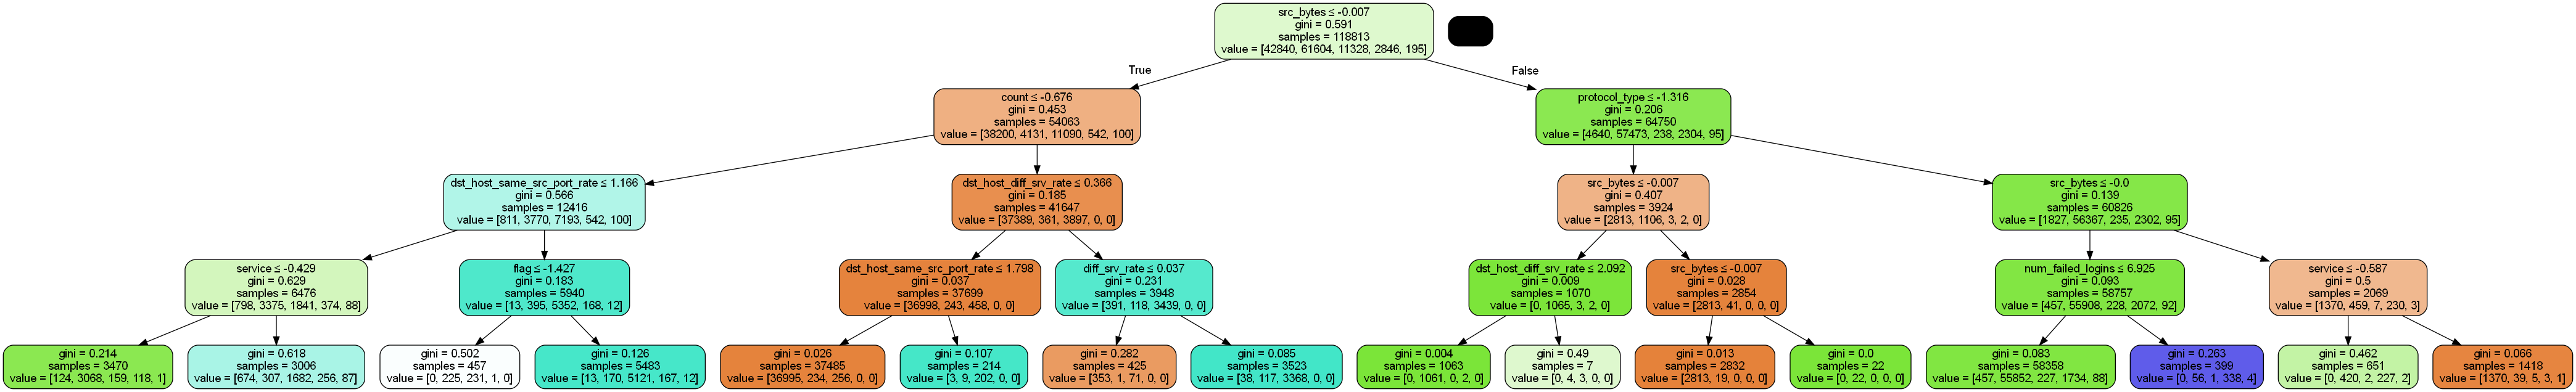

In [18]:
# from sklearn.tree import DecisionTreeClassifier 

# classifier = DecisionTreeClassifier(criterion='gini')

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
DT_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, DT_pred_y)
error = zero_one_loss(testY, DT_pred_y)
DT_time = time.time() - t #Total time
DT_acc = round(accuracy_score(testY, DT_pred_y) * 100, 2)
DT_prec = round(precision_score(testY, DT_pred_y, average = 'weighted') * 100, 2)
DT_rec = round(recall_score(testY, DT_pred_y, average = 'weighted') * 100, 2)
DT_kappa = round(cohen_kappa_score(testY, DT_pred_y) * 100, 2)
DT_f1_sc = round(f1_score(testY, DT_pred_y, average = 'weighted') * 100, 2)
DT_err = round(zero_one_loss(testY, DT_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Decision Tree Classifier\033[0m")
DT_clr = pd.DataFrame(classification_report(testY, DT_pred_y, target_names=labels, output_dict=True))
display(DT_clr)

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
clf = DecisionTreeClassifier(criterion='gini',max_depth = 4)
clf.fit(x_train, trainY)
export_graphviz(clf, out_file=dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_Jalees.png')
Image(graph.create_png())

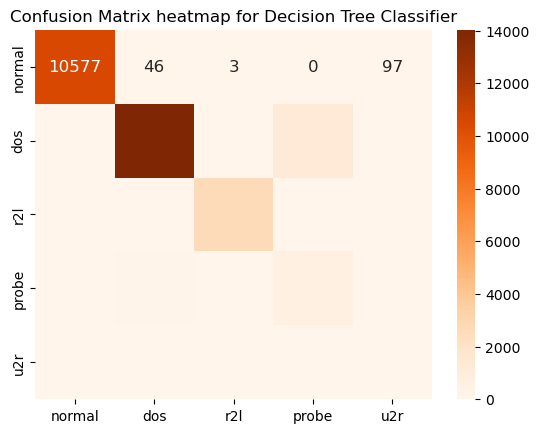

In [19]:
## Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Decision Tree Classifier')
plt.show()

#### Random Forrest

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Random Forest Classifier


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.998131,0.993356,0.988439,0.992775,0.950000,0.994546,0.984540,0.994527
recall,0.996176,0.996699,0.995271,0.947586,0.666667,0.994546,0.920480,0.994546
f1-score,0.997153,0.995025,0.991843,0.969654,0.783505,0.994546,0.947436,0.994473
support,10723.000000,15450.000000,2749.000000,725.000000,57.000000,0.994546,29704.000000,29704.000000


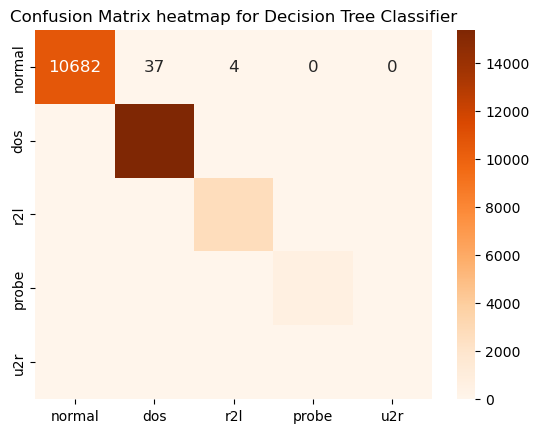

In [21]:
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier()

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
RF_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, RF_pred_y)
error = zero_one_loss(testY, RF_pred_y)
RF_time = time.time() - t #Total time
RF_acc = round(accuracy_score(testY, RF_pred_y) * 100, 2)
RF_prec = round(precision_score(testY, RF_pred_y, average = 'weighted') * 100, 2)
RF_rec = round(recall_score(testY, RF_pred_y, average = 'weighted') * 100, 2)
RF_kappa = round(cohen_kappa_score(testY, RF_pred_y) * 100, 2)
RF_f1_sc = round(f1_score(testY, RF_pred_y, average = 'weighted') * 100, 2)
RF_err = round(zero_one_loss(testY, RF_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Random Forest Classifier\033[0m")
RF_clr = pd.DataFrame(classification_report(testY, RF_pred_y, target_names=labels, output_dict=True))
display(RF_clr)

## Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Decision Tree Classifier')
plt.show()

#### K-Nearest Neighbor Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                  leaf_size=30)
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for k-Nearest Neighbors


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.990779,0.994800,0.951453,0.893316,0.261364,0.982225,0.818342,0.985452
recall,0.991980,0.978188,0.976719,0.958621,0.807018,0.982225,0.942505,0.982225
f1-score,0.991379,0.986424,0.963920,0.924817,0.394850,0.982225,0.852278,0.983491
support,10723.000000,15450.000000,2749.000000,725.000000,57.000000,0.982225,29704.000000,29704.000000


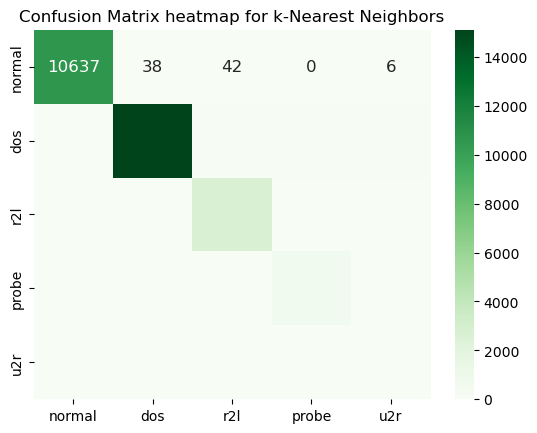

In [23]:
#Import classifier function from sklearn library
# from sklearn.neighbors import KNeighborsClassifier
# #Set classifier parameters according to the input data
# classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
#                                   leaf_size=30)
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
knn_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, knn_pred_y)
error = zero_one_loss(testY, knn_pred_y)
knn_time = time.time() - t #Total time
knn_acc = round(accuracy_score(testY, knn_pred_y) * 100, 2)
knn_prec = round(precision_score(testY, knn_pred_y, average = 'weighted') * 100, 2)
knn_rec = round(recall_score(testY, knn_pred_y, average = 'weighted') * 100, 2)
knn_kappa = round(cohen_kappa_score(testY, knn_pred_y) * 100, 2)
knn_f1_sc = round(f1_score(testY, knn_pred_y, average = 'weighted') * 100, 2)
knn_err = round(zero_one_loss(testY, knn_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for k-Nearest Neighbors\033[0m")
knn_clr = pd.DataFrame(classification_report(testY, knn_pred_y, target_names=labels, output_dict=True))
display(knn_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Logistic Regression CLassifier


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.978013,0.992243,0.755903,0.314547,0.075643,0.892405,0.623270,0.946934
recall,0.974820,0.827896,0.931611,0.900690,0.877193,0.892405,0.902442,0.892405
f1-score,0.976414,0.902650,0.834610,0.466262,0.139276,0.892405,0.663842,0.910865
support,10723.000000,15450.000000,2749.000000,725.000000,57.000000,0.892405,29704.000000,29704.000000


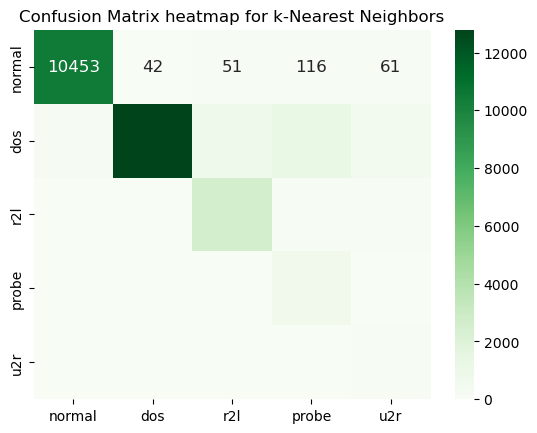

In [25]:
# #Import classifier function from sklearn library
# from sklearn.linear_model import LogisticRegression
# #Set classifier parameters according to the input data
# classifier = LogisticRegression()

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(x_train, trainY)
#Prediction of test data
LR_pred_y = classifier.predict(x_test)
#Classifier performance measures
results = confusion_matrix(testY, LR_pred_y)
error = zero_one_loss(testY, LR_pred_y)
LR_time = time.time() - t #Total time
LR_acc = round(accuracy_score(testY, LR_pred_y) * 100, 2)
LR_prec = round(precision_score(testY, LR_pred_y, average = 'weighted') * 100, 2)
LR_rec = round(recall_score(testY, LR_pred_y, average = 'weighted') * 100, 2)
LR_kappa = round(cohen_kappa_score(testY, LR_pred_y) * 100, 2)
LR_f1_sc = round(f1_score(testY, LR_pred_y, average = 'weighted') * 100, 2)
LR_err = round(zero_one_loss(testY, LR_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Logistic Regression CLassifier\033[0m")
LR_clr = pd.DataFrame(classification_report(testY, LR_pred_y, target_names=labels, output_dict=True))
display(LR_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### SVM

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for SVM


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.995235,0.995383,0.943574,0.592174,0.177866,0.967748,0.740846,0.979125
recall,0.993285,0.948867,0.985449,0.939310,0.789474,0.967748,0.931277,0.967748
f1-score,0.994259,0.971569,0.964057,0.726400,0.290323,0.967748,0.789321,0.971773
support,10723.000000,15450.000000,2749.000000,725.000000,57.000000,0.967748,29704.000000,29704.000000


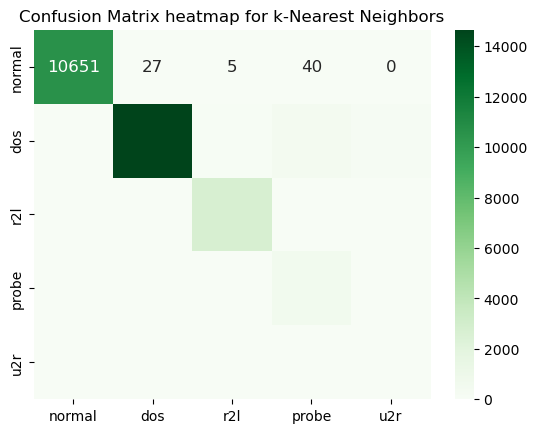

In [27]:
# #Import classifier function from sklearn library
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# #Set classifier parameters according to the input data

# classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))

#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
svm_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, svm_pred_y)
error = zero_one_loss(testY, svm_pred_y)
svm_time = time.time() - t #Total time
svm_acc = round(accuracy_score(testY, svm_pred_y) * 100, 2)
svm_prec = round(precision_score(testY, svm_pred_y, average = 'weighted') * 100, 2)
svm_rec = round(recall_score(testY, svm_pred_y, average = 'weighted') * 100, 2)
svm_kappa = round(cohen_kappa_score(testY, svm_pred_y) * 100, 2)
svm_f1_sc = round(f1_score(testY, svm_pred_y, average = 'weighted') * 100, 2)
svm_err = round(zero_one_loss(testY, svm_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for SVM\033[0m")
svm_clr = pd.DataFrame(classification_report(testY, svm_pred_y, target_names=labels, output_dict=True))
display(svm_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Greens',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for k-Nearest Neighbors')
plt.show()

#### Neural Network Classifier

In [28]:
#Import classifier function from sklearn library
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100))
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for Neural Network


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.998782,0.992880,0.970766,0.805848,0.723077,0.986938,0.898271,0.987881
recall,0.993845,0.983819,0.990542,0.950345,0.824561,0.986938,0.948622,0.986938
f1-score,0.996307,0.988329,0.980555,0.872152,0.770492,0.986938,0.921567,0.987236
support,10723.000000,15450.000000,2749.000000,725.000000,57.000000,0.986938,29704.000000,29704.000000


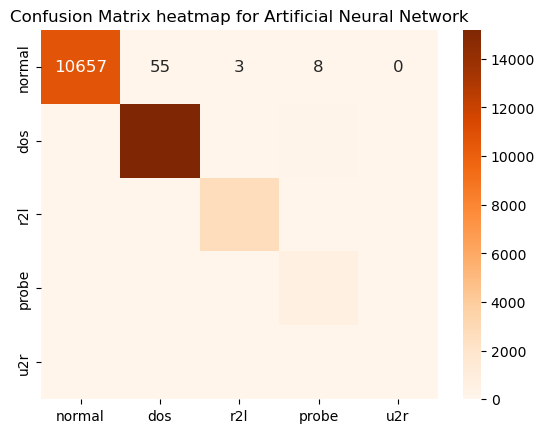

In [29]:
# #Import classifier function from sklearn library
# from sklearn.neural_network import MLPClassifier
# #Set classifier parameters according to the input data
# classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100))
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(x_train, trainY)
#Prediction of test data
NN_pred_y = classifier.predict(x_test)
#Classifier performance measures
results = confusion_matrix(testY, NN_pred_y)
error = zero_one_loss(testY, NN_pred_y)
NN_time = time.time() - t #Total time
NN_acc = round(accuracy_score(testY, NN_pred_y) * 100, 2)
NN_prec = round(precision_score(testY, NN_pred_y, average = 'weighted') * 100, 2)
NN_rec = round(recall_score(testY, NN_pred_y, average = 'weighted') * 100, 2)
NN_kappa = round(cohen_kappa_score(testY, NN_pred_y) * 100, 2)
NN_f1_sc = round(f1_score(testY, NN_pred_y, average = 'weighted') * 100, 2)
NN_err = round(zero_one_loss(testY, NN_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for Neural Network\033[0m")
NN_clr = pd.DataFrame(classification_report(testY, NN_pred_y, target_names=labels, output_dict=True))
display(NN_clr)

##### Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Oranges',annot=True, annot_kws={"size": 12}, fmt="d")
plt.title('Confusion Matrix heatmap for Artificial Neural Network')
plt.show()

#### AdaBoost

In [30]:
model = RandomForestClassifier()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under), ('model', model)]
classifier = Pipeline(steps=steps)

Comparison Table for AdaBoost Classifier


,normal,dos,r2l,probe,u2r,accuracy,macro avg,weighted avg
precision,0.948355,0.906403,0.890349,0.728155,0.0,0.919236,0.694653,0.913972
recall,0.924741,0.980324,0.788650,0.103448,0.0,0.919236,0.559433,0.919236
f1-score,0.936399,0.941915,0.836420,0.181159,0.0,0.919236,0.579179,0.909785
support,10723.000000,15450.000000,2749.000000,725.000000,57.0,0.919236,29704.000000,29704.000000


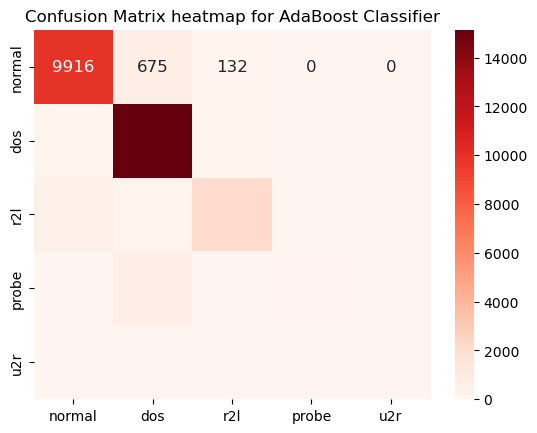

In [31]:
#Import classifier function from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Set classifier parameters according to the input data
classifier = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
#Network fitting and time calcualtion
t = time.time() #Time start
clsf = classifier.fit(trainX, trainY)
#Prediction of test data
AdB_pred_y = classifier.predict(testX)
#Classifier performance measures
results = confusion_matrix(testY, AdB_pred_y)
error = zero_one_loss(testY, AdB_pred_y)
AdB_time = time.time() - t #Total time
AdB_acc = round(accuracy_score(testY, AdB_pred_y) * 100, 2)
AdB_prec = round(precision_score(testY, AdB_pred_y, average = 'weighted') * 100, 2)
AdB_rec = round(recall_score(testY, AdB_pred_y, average = 'weighted') * 100, 2)
AdB_kappa = round(cohen_kappa_score(testY, AdB_pred_y) * 100, 2)
AdB_f1_sc = round(f1_score(testY, AdB_pred_y, average = 'weighted') * 100, 2)
AdB_err = round(zero_one_loss(testY, AdB_pred_y) * 100, 2)
#Visualization of output performance measures
print("\033[1mComparison Table for AdaBoost Classifier\033[0m")
AdB_clr = pd.DataFrame(classification_report(testY, AdB_pred_y, target_names=labels, output_dict=True))
display(AdB_clr)

## Plotting of Confusion matrix if needed
df_cm = pd.DataFrame(results, index=labels, columns=labels)
sn.heatmap(df_cm, cmap='Reds',annot=True, annot_kws={"size": 12}, fmt="d") # font size
plt.title('Confusion Matrix heatmap for AdaBoost Classifier')
plt.show()

### b) Overall Comparisons

#### Table comparison between all algorithms performance measures

In [32]:
#Saving all algorithms in single dataframe
overall = pd.DataFrame({'Algorithm': ['DeciTree', 'RanForest', 'kNN', 'LR', 'SVM', 'DNN', 'AdaBoost'],
                    'Accuracy(%)': [DT_acc, RF_acc, knn_acc, LR_acc, svm_acc, NN_acc, AdB_acc],
                   'Precision(%)': [DT_prec, RF_prec, knn_prec, LR_prec, svm_prec, NN_prec, AdB_prec],
                   'Recall(%)': [DT_rec, RF_rec, knn_rec, LR_rec, svm_rec, NN_rec, AdB_rec],
                    'F1-Score(%)': [DT_f1_sc, RF_f1_sc, knn_f1_sc, LR_f1_sc, svm_f1_sc, NN_f1_sc, AdB_f1_sc],
                   'Error(%)': [DT_err, RF_err, knn_err, LR_err, svm_err, NN_err, AdB_err],
                     'Time(s)': [DT_time, RF_time, knn_time, LR_time, svm_time, NN_time, AdB_time]})
display(overall)

,Algorithm,Accuracy(%),Precision(%),Recall(%),F1-Score(%),Error(%),Time(s)
0,DeciTree,93.95,96.89,93.95,95.06,6.05,11.935497
1,RanForest,99.45,99.45,99.45,99.45,0.55,10.502914
2,kNN,98.22,98.55,98.22,98.35,1.78,35.462689
3,LR,89.24,94.69,89.24,91.09,10.76,16.483207
4,SVM,96.77,97.91,96.77,97.18,3.23,1069.158704
5,DNN,98.69,98.79,98.69,98.72,1.31,199.719380
6,AdaBoost,91.92,91.40,91.92,90.98,8.08,24.557229


#### Bar plot comparison between accuracy of different algorithms

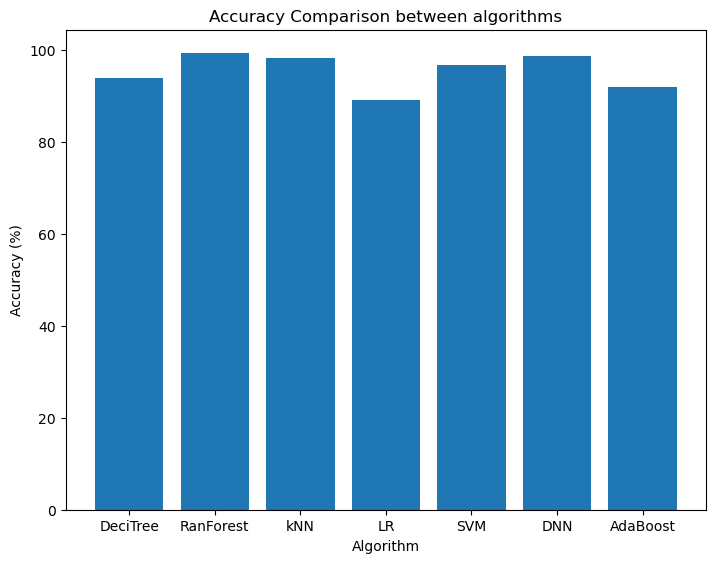

In [33]:
all_acc = [DT_acc, RF_acc, knn_acc, LR_acc, svm_acc, NN_acc, AdB_acc]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['DeciTree', 'RanForest', 'kNN', 'LR', 'SVM', 'DNN', 'AdaBoost']
ax.bar(algos, all_acc)
plt.title('Accuracy Comparison between algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.show()

# The END